<a href="https://colab.research.google.com/github/TanishUpadhyay/ML_termwork/blob/main/LAB5/CE149_EXERCISE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **LAB 05**
EXERCISE

## **Task 1: Try the algo on Same Weather dataset - LabelEncoding of features:and Train test Division 95%-5%**

test_pred :  [0]
test_output :  [1]


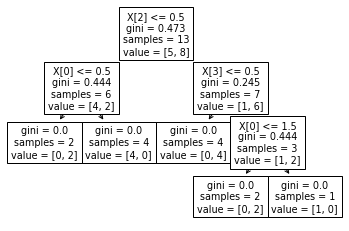

In [34]:
outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
temp = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal','High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True','False', 'False', 'False', 'True', 'True', 'False', 'True']
play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No','Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

from sklearn import preprocessing

prepro=preprocessing

lb=prepro.LabelEncoder()

outlook=lb.fit_transform(outlook)
temp=lb.fit_transform(temp)
humidity=lb.fit_transform(humidity)
wind=lb.fit_transform(wind)
play=lb.fit_transform(play)

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

input=list(zip(outlook,temp,humidity,wind))
output=play

ri=0
for row in input:
  input[ri]=list(row)
  ri+=1


from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output = train_test_split(input,output,
                                   random_state=149, 
                                   test_size=0.05, 
                                   shuffle=True)

model=DecisionTreeClassifier()
model.fit(train_input,train_output)

tree.plot_tree(model)

test_pred=model.predict(test_input)
print("test_pred : ",test_pred)
print("test_output : ",test_output)



In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,test_output)

array([[0, 1],
       [0, 0]])

In [35]:
# print(confusion_matrix(test_output,test_pred))
# print(classification_report(test_output,test_pred))
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)



In [36]:
perf_measure(test_output,test_pred)

(0, 0, 0, 1)

## **Task 2: Apply algorithm on wine dataset - LabelEncoding of features: and Train test Division 66%-34%**

In [26]:
from sklearn.datasets import load_wine
wine= load_wine()
input=wine.data
output=wine.target

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output = train_test_split(input,output,
                                   random_state=149, 
                                   test_size=0.34, 
                                   shuffle=True)


model=DecisionTreeClassifier()
model.fit(train_input,train_output)

test_pred=model.predict(test_input)

cmat=confusion_matrix(test_pred,test_output)

truth=sum(cmat[i][i] for i in range(len(cmat)))
total=0
for row in cmat:
  for elem in row:
    total+=elem
accuracy=truth/total
print("accuracy : ",accuracy)

accuracy :  0.9344262295081968


In [27]:
print(confusion_matrix(test_output,test_pred))
print(classification_report(test_output,test_pred))


[[17  0  0]
 [ 2 23  2]
 [ 0  0 17]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.85      0.92        27
           2       0.89      1.00      0.94        17

    accuracy                           0.93        61
   macro avg       0.93      0.95      0.94        61
weighted avg       0.94      0.93      0.93        61

